In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
categories = pd.read_csv("categories.csv")
print(categories.dtypes)
categories.head()


id              int64
name           object
parent_id       int64
parent_name    object
dtype: object


,id,name,parent_id,parent_name
0,1509,3D Druckmaterialien,6,Elektroartikel
1,37,3D-Brillen,6,Elektroartikel
2,724,3D-Drucker,6,Elektroartikel
3,1305,AV-Sender,6,Elektroartikel
4,1190,AV-Umschalter & Verteiler,6,Elektroartikel


In [3]:
product_earnings = pd.read_csv("product_earnings.csv")
print(product_earnings.dtypes)
product_earnings.head()

product_id          int64
category_id         int64
Januar 2022       float64
Februar 2022      float64
März 2022         float64
April 2022        float64
Mai 2022          float64
Juni 2022         float64
Juli 2022         float64
August 2022       float64
September 2022    float64
Oktober 2022      float64
November 2022     float64
Dezember 2022     float64
dtype: object


,product_id,category_id,Januar 2022,Februar 2022,März 2022,April 2022,Mai 2022,Juni 2022,Juli 2022,August 2022,September 2022,Oktober 2022,November 2022,Dezember 2022
0,0,1292,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1553,NaN,NaN,38.0,NaN,NaN,13.0,NaN,43.0,NaN,NaN,NaN,NaN
2,2,1882,NaN,14.0,NaN,56.0,NaN,14.0,28.0,NaN,NaN,215.0,205.0,NaN
3,3,889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN
4,4,238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN


In [4]:
# merge dataframes
merged_data = pd.merge(product_earnings, categories, how='left', left_on='category_id', right_on='id') # mergen anhand der kategorien
merged_data.head(20)

,product_id,category_id,Januar 2022,Februar 2022,März 2022,April 2022,Mai 2022,Juni 2022,Juli 2022,August 2022,September 2022,Oktober 2022,November 2022,Dezember 2022,id,name,parent_id,parent_name
0,0,1292,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1292,Sanitärinstallationen,2,Haus & Garten
1,1,1553,NaN,NaN,38.0,NaN,NaN,13.0,NaN,43.0,NaN,NaN,NaN,NaN,1553,Küchenhelfer,2,Haus & Garten
2,2,1882,NaN,14.0,NaN,56.0,NaN,14.0,28.0,NaN,NaN,215.0,205.0,NaN,1882,Studiomonitore,6,Elektroartikel
3,3,889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,889,Party-Spiele,3,Gaming & Spielen
4,4,238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN,238,Tier-Orthopädie,7,Tierbedarf
5,5,1817,NaN,NaN,NaN,NaN,11.0,23.0,NaN,45.0,NaN,NaN,NaN,11.0,1817,Außenleuchten,2,Haus & Garten
6,6,358,NaN,NaN,NaN,13.0,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,358,Kaminholzregale,2,Haus & Garten
7,7,1300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,1300,Lauflernhilfen,3,Gaming & Spielen
8,8,243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,243,Massagegeräte,6,Elektroartikel
9,9,53,NaN,NaN,NaN,NaN,NaN,9.0,NaN,14.0,NaN,NaN,NaN,NaN,53,Auto-Karosserien & Schließanlagen,1,Auto & Motorrad


In [5]:
# Aggregieren der monatlichen Einnahmen pro Kategorie
category_earnings = merged_data.groupby('name').sum() # name ist name der kategorie
category_earnings.head()

# Berechnen der Gesamteinnahmen pro Kategorie für das Jahr 2022
earning_columns = ['Januar 2022', 'Februar 2022', 'März 2022', 'April 2022', 'Mai 2022', 'Juni 2022', 'Juli 2022', 'August 2022', 'September 2022', 'Oktober 2022', 'November 2022', 'Dezember 2022']
category_earnings = merged_data.groupby('name')[earning_columns].sum()

category_earnings['Total_2022'] = category_earnings.sum(axis=1)
# Sortieren der Kategorien nach Gesamteinnahmen
sorted_categories = category_earnings.sort_values(by='Total_2022', ascending=False)

# Anzeigen der Ergebnisse
print(sorted_categories[['Total_2022']])

                     Total_2022
name                           
Kindersitze           31342.580
Flöten                30661.608
Reifen                30525.774
Malgründe             29225.559
Tarierjackets         28496.379
...                         ...
Akkuschrauber          3770.000
Hundeleinen            3767.000
Fischfutter            3607.000
Instrumentenständer    3377.000
Zahnpflege             3009.511

[2052 rows x 1 columns]


### Bestimme sinnvolle Bucketgrößen und weise den Kategorien Klassen zu.


In [8]:
# Berechnen der kumulativen Prozentanteile
sorted_categories['Cumulative_Percentage'] = 100 * (sorted_categories['Total_2022'].cumsum() / sorted_categories['Total_2022'].sum())

# Bestimmung der kumulativen Prozentanteile
#sorted_categories['Cumulative_Percentage'] = sorted_categories['Total_2022'].cumsum() / sorted_categories['Total_2022'].sum()

# Zuweisung der Kategorien zu den Buckets A, B, C nach dem Pareto-Prinzip

# bucketgröße: A: 20%, B: 30%, C: 50%
# quelle angeben

sorted_categories['Class'] = 'C'  # default alle als C einstufen
sorted_categories.loc[sorted_categories['Cumulative_Percentage'] < 95, 'Class'] = 'B'
sorted_categories.loc[sorted_categories['Cumulative_Percentage'] < 80, 'Class'] = 'A'


# Anzeigen der Klassifizierungen
print(sorted_categories[['Total_2022', 'Cumulative_Percentage', 'Class']])



                     Total_2022  Cumulative_Percentage Class
name                                                        
Kindersitze           31342.580               0.117130     A
Flöten                30661.608               0.231715     A
Reifen                30525.774               0.345793     A
Malgründe             29225.559               0.455011     A
Tarierjackets         28496.379               0.561505     A
...                         ...                    ...   ...
Akkuschrauber          3770.000              99.948576     C
Hundeleinen            3767.000              99.962653     C
Fischfutter            3607.000              99.976133     C
Instrumentenständer    3377.000              99.988753     C
Zahnpflege             3009.511             100.000000     C

[2052 rows x 3 columns]


### Welche Verteilung der Klassen zeigt sich über den gesamten Katalog bzw. in den unterschiedlichen Inventarbereichen?


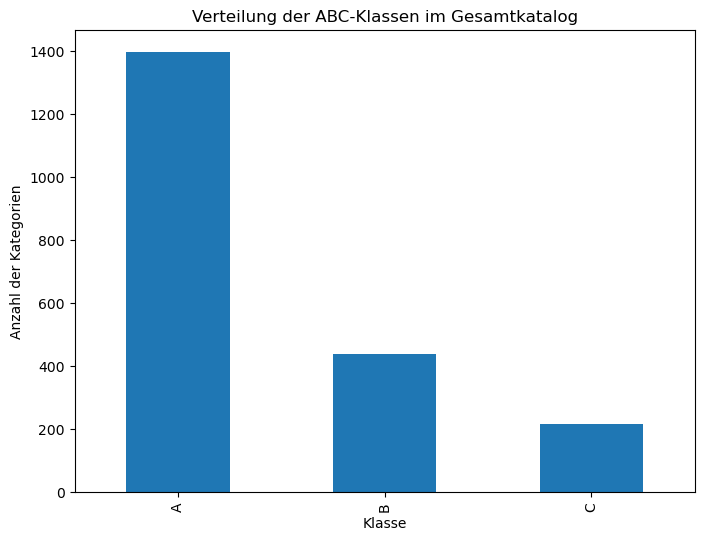

In [9]:

# Zählen, wie viele Kategorien in jeder Klasse sind
class_distribution = sorted_categories['Class'].value_counts()

plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar')
plt.title('Verteilung der ABC-Klassen im Gesamtkatalog')
plt.xlabel('Klasse')
plt.ylabel('Anzahl der Kategorien')
plt.show()

# in streamlit interaktiv machen -> gesamtzahl beim hover anzeigen
# bestimmen welche kategorien in den klassen A,B,C sind und mitvisualisieren

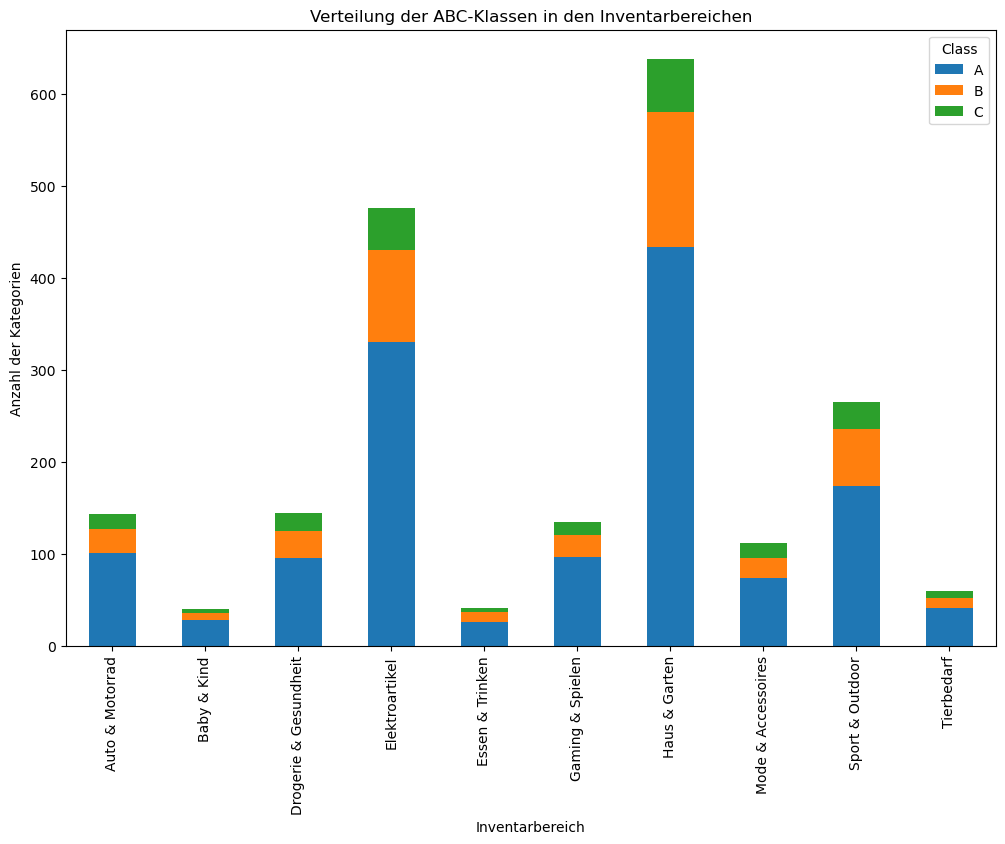

In [10]:
# Zusammenführen der klassifizierten Daten mit den Inventarbereichen
full_data = pd.merge(sorted_categories, categories, left_index=True, right_on='name', how='left')

# Gruppieren nach Inventarbereich und Klasse
inventory_class_distribution = full_data.groupby(['parent_name', 'Class']).size().unstack().fillna(0) 

# Visualisieren der Verteilung in den Inventarbereichen
inventory_class_distribution.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Verteilung der ABC-Klassen in den Inventarbereichen')
plt.xlabel('Inventarbereich')
plt.ylabel('Anzahl der Kategorien')
plt.show()

# hier interaktiv prozentualen anteil in den säulenabschnitten der inventarbereiche angeben
# außerdem möchte ich die verteilung der inventarbereiche in den klassen sehen

### Welche saisonalen Schwerpunkte würdest Du Content Management empfehlen?

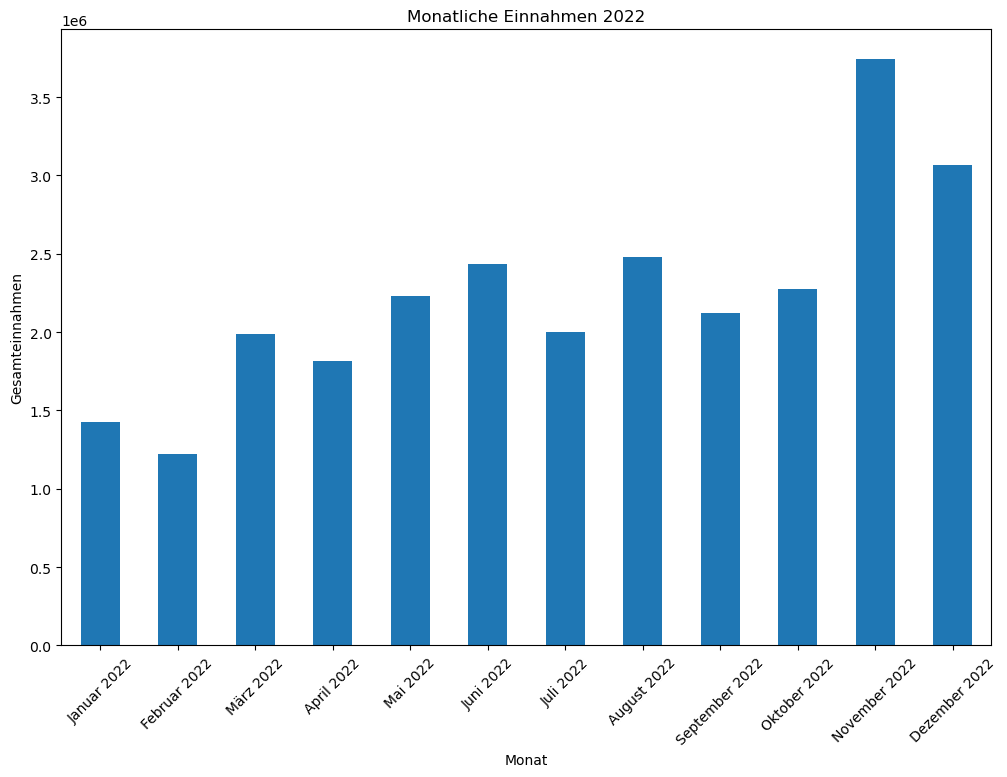

In [11]:
# Aggregieren der monatlichen Einnahmen
monthly_earnings = merged_data[earning_columns].sum()

# Visualisieren der saisonalen Trends
plt.figure(figsize=(12, 8))
monthly_earnings.plot(kind='bar')
plt.title('Monatliche Einnahmen 2022')
plt.xlabel('Monat')
plt.ylabel('Gesamteinnahmen')
plt.xticks(rotation=45)
plt.show()

# monatliche einnahmen pro inventarbereich in säule einbauen


# zu sehen ist, dass die einnahmen mit jahresverlauf ansteigen. vor allem im november und dezember (black friday und weihnachten)
# januar und februar wenig einnahmen -> hier könnte man mit angeboten pushen
# vor allem mit angeboten die zu der jahreszeit passen


### Kann man darstellen, welche Kategorien in Zukunft voraussichtlich in eine andere Klasse wechseln?


In [ ]:
# umsatzanteil einer kategorie pro monat
# umsatzstärkste kategorie einer klasse bestimmen


### Was sind die Vor- und Nachteile der ABC-Analyse für diese Fragestellung? Würdest Du einen anderen Ansatz bevorzugen und warum?


Nachteile:
- es könnte ein produkt in C geben, welches super viel umsatz macht, aber nicht in Kategorie A fällt, aber nach Kategorien Marketing machst (dementsprechend kat. A). Das Produkt in Kategorie C würde dementsprechend untergehen.
- Produkte mit steigendem Umsatz sind noch in niedriger Kategorie eingestuft, aber haben steigenden Trend. Es sollte daher in das Produkt investiert werden, aber nach ABC Analyse würde man nur die Produkte aus A pushen.
- chatti nach anderen ansätzen fragen
